# Global libraries

In [2]:
############################################# import libraries ###############################
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import (LinearSegmentedColormap,ListedColormap)
import matplotlib.ticker as mtick
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator,LogLocator)
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.collections import LineCollection
from matplotlib import cm

############################################ 
import pandas as pd
import glob
import os
from os import listdir
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy.polynomial.polynomial as poly

########################################### for image composition
import svgutils.compose as sc
from IPython.display import SVG
import matplotlib.image as imgs 
from PIL import Image 

### scypy libraries
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy import optimize
from scipy.interpolate import *
from scipy.signal import savgol_filter
from scipy import integrate
import scipy.interpolate as si
# from scipy.interpolate import BSpline
import scipy.interpolate as interpolate

### lmfit libraries, used for curve and peak fitting 
import lmfit 
import asteval
from lmfit import *
from lmfit import models
from lmfit.model import load_model
from lmfit.model import save_modelresult
from lmfit.models import (ExpressionModel, GaussianModel, ExponentialModel,PowerLawModel,
                          StepModel,LinearModel) 

###################### other libraries
from brukeropusreader import read_file  #opus_data = read_file('opus_file.0')
import ntpath
import argparse
import sys
import statsmodels.api as sm
from patsy import dmatrices
from BaselineRemoval import BaselineRemoval




############################################# plotting style ###################################

plt.style.use('seaborn-paper')
plt.rc('font', family='serif')
plt.rcParams['figure.dpi']= 150

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 8.2,
        "font.size": 8.2,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 7.8,
        "ytick.labelsize": 7.8,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'ytick.minor.left': True,
        'xtick.minor.bottom': True,
        'ytick.direction': 'in',
        'xtick.direction': 'in',
}
plt.rcParams.update(nice_fonts)

# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

 # Chapter 2 Experimental details

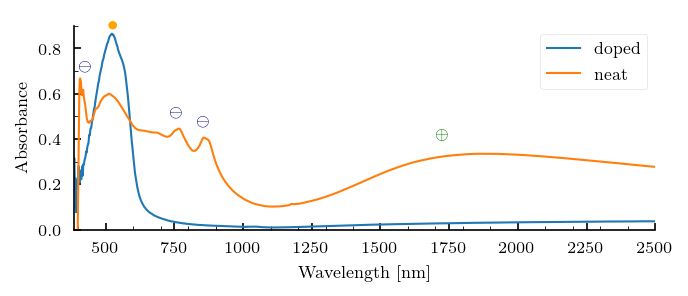

In [126]:
# data import
uv_vis = pd.read_csv("Chapter_2/uvvis_c2_f5.csv",index_col=None, header=0) 

# tidy format –––––––––––––––
# data melt, mostly for me
uv_vis_melt=pd.melt(uv_vis, 
        id_vars=['Wavelenght [nm]'], #Column(s) to use as identifier variables.
#         value_vars=['B'], # Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
        var_name='film', # Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
        value_name='absorbance' # Name to use for the ‘value’ column.
        #ignore_index=False
       )
uv_vis_melt=uv_vis_melt.dropna() #drops nan values

# figure creation ––––––––––––––
fig = plt.figure(figsize=(5,1.8), constrained_layout=False)
ax = fig.add_subplot(1, 1, 1,)# yticklabels=[], yticks=[])

# plot section –––––
sns.lineplot(data=uv_vis_melt, x='Wavelenght [nm]', y='absorbance', hue='film', lw=1)

# annotations in plot –––––––––
ax.annotate("\\textbf{$\ominus$}", xy=(730, 0.5), xycoords="data", fontsize=8, color= 'navy', zorder=20)
ax.annotate("\\textbf{$\ominus$}", xy=(830, 0.46), xycoords="data", fontsize=8, color= 'navy', zorder=20)
ax.annotate("\\textbf{$\\bullet$}", xy=(510, 0.88), xycoords="data", fontsize=11, color= 'orange', zorder=20)
ax.annotate("\\textbf{$\oplus$}", xy=(1700, 0.4), xycoords="data", fontsize=8, color= 'green', zorder=20)
ax.annotate("\\textbf{$\ominus$}", xy=(400, 0.7), xycoords="data", fontsize=8, color= 'navy', zorder=20)

# legend positioning ––––––––––
ax.legend(labels,loc='upper right',bbox_to_anchor=(1, 1))

# axes configuraiton ––––––––––
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorbance")
ax.set_xlim(385,2500)
ax.set_ylim(0,0.9);
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# export figure––––––
# fig.savefig('path/name.pdf', bbox_inches='tight')

**Figure 2_5** : UV-Vis-NIR absorbance spectrum for a film of PBTTT, in its pristine state (blue line), and doped with F4TCNQ (red line). Symbols in the plot indicate the characteristic bands of the F4TCNQ•–(⊖), the neutral polymer (•), and the polaron (⊕)

# Chapter 5

In [681]:
Monte_Carlo_Data_melt.to_csv(r'/Users/Zapata/Documents/GitHub/My_repos/OZA_PhD/Chapter_5/Monte_Carlo/Monte_Carlo_Data_melt.csv', index = False) # exports the dataframe to a csv file

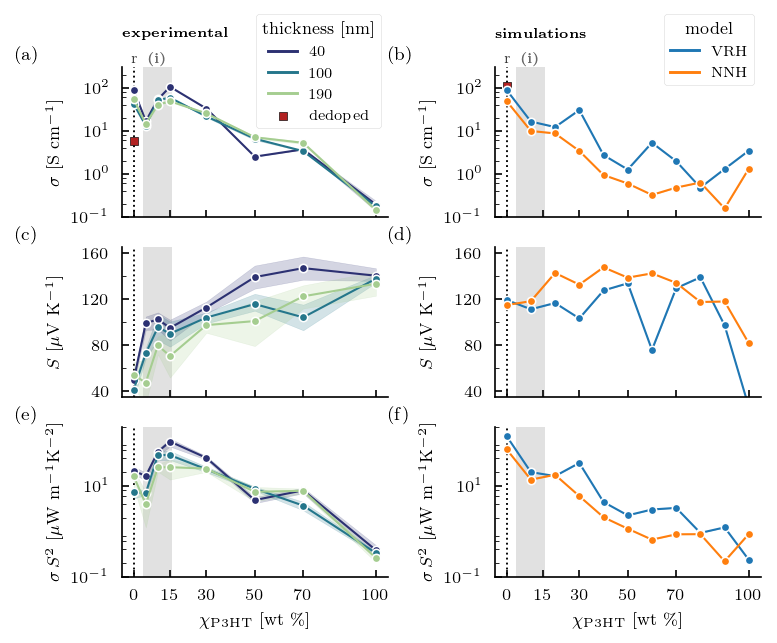

In [668]:
#data import–––––––––––
te_experimental_c5_f4 = pd.read_csv("Chapter_5/TE_characterization/te_experimental_c5_f4.csv",index_col=None, header=0)
Monte_Carlo_Data_melt = pd.read_csv("Chapter_5/Monte_Carlo/Monte_Carlo_Data_melt.csv",index_col=None, header=0)

# Monte_Carlo_Data_melt.csv
# Monte_carlo_data
# setting the whole figure dimensions–––––––––––
fig, ((ax1, ax2), (ax3,ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(5.5,4.5), sharex=True)

# Experimental measurements––––––––––– 
sns.lineplot(data=te_experimental_c5_f4, x='p3ht_load',y='sigma', hue='thickness', marker='o', lw=1, ax=ax1, markersize=4, palette='crest_r', ci=95,legend=True)
sns.lineplot(data=te_experimental_c5_f4, x='p3ht_load',y='Seebeck', hue='thickness', marker='o', lw=1, ax=ax3, markersize=4, palette='crest_r', ci=95,legend=None)
sns.lineplot(data=te_experimental_c5_f4, x='p3ht_load',y='power factor', hue='thickness', marker='o', lw=1, ax=ax5, markersize=4, palette='crest_r',  ci=95,legend=None)

# Monte Carlo simulations––––––––––– simulations are scaled!!!
sns.lineplot(data=Monte_Carlo_Data_melt, x='p3ht load',y=(Monte_Carlo_Data_melt['sigma']*5), hue='model', marker='o', lw=1, ax=ax2, markersize=4, legend=True, )

# sns.lineplot(data=MC_melt, x='p3ht load',y=(MC_melt['sigma']*5), hue='model', marker='o', lw=1, ax=ax2, markersize=4, legend=True, )
sns.lineplot(data=MC_melt, x='p3ht load',y=(MC_melt['Seebeck']*0.2), hue='model', marker='o', lw=1, ax=ax4, markersize=4, legend=None )
sns.lineplot(data=MC_melt, x='p3ht load',y=(((MC_melt['Seebeck']*0.2)**2)*(MC_melt['sigma']*5)*0.0001), hue='model', marker='o', lw=1, ax=ax6, markersize=4, legend=None )

# dedoped points, taken from, chapter 3––––
ax1.scatter(0,5.85,s=15,color='firebrick',edgecolor='k',lw=0.3, marker='s',label='dedoped',zorder=-10)
ax2.scatter(0,109,s=15,color='firebrick',edgecolor='k',lw=0.3,marker='s',zorder=-10)


# limits, labels, ––––––––
for axes in [ax1.axes,ax2.axes,ax3.axes,ax4.axes,ax5.axes,ax6.axes]:
    axes.set_xticks([0, 15, 30,50,70,100])
for axes in [ax1.axes,ax2.axes,ax5.axes, ax6.axes]:
    axes.set_yscale('log')
for axes in [ax1.axes,ax2.axes]:
    axes.set_ylim(1E-1, 3E2)
    axes.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=4))
    axes.yaxis.set_minor_locator(ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=5))
    axes.yaxis.set_minor_formatter(ticker.NullFormatter())
    axes.set_ylabel("$\sigma$ [S cm$^{-1}$]")
    axes.annotate('\\textbf{(i)}', xy=(0.098,1.03), xycoords="axes fraction", color='dimgray',fontsize=7)
    axes.annotate('r', xy=(0.035,1.03), xycoords="axes fraction", color='k',alpha=0.8,fontsize=7)
for axes in [ax3.axes,ax4.axes ]:
    axes.set_ylim(35,165)
    axes.set_ylabel("$S$ [$\mu$V K$^{-1}$]")
    axes.yaxis.set_major_locator(plt.MaxNLocator(4))
    axes.yaxis.set_minor_locator(MultipleLocator(20))
for axes in [ax5.axes,ax6.axes]:
    axes.set_xlabel("$\chi _\mathrm{P3HT}$ [wt \%]")
    axes.set_ylim(1E-1, 2E2)
    axes.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=3))
    axes.yaxis.set_minor_locator(ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=5))
    axes.yaxis.set_minor_formatter(ticker.NullFormatter())
    axes.set_ylabel("$\sigma\,S^2$ [$\mu$W m$^{-1} $K$^{-2}$]")
    
for axes in [ax1.axes,ax2.axes,ax3.axes,ax4.axes,ax5.axes,ax6.axes]:
#     axes.axvspan(-1, 1, facecolor='k', alpha=0.5,zorder=-100)
    axes.axvspan(4, 16, facecolor='dimgray', alpha=0.2,zorder=-100)
    axes.axvline(0, -5,100, color='k', zorder=-100,lw=0.9,ls=':')

    
# specific annotations –––––––––
ax1.annotate('\\textbf{experimental}', xy=(0,1.2), xycoords="axes fraction", fontsize=6.5)
ax2.annotate('\\textbf{simulations}', xy=(0,1.2), xycoords="axes fraction", fontsize=6.5)
ax1.annotate("(a)", xy=(-0.4, 1.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("(b)", xy=(-0.4, 1.05), xycoords="axes fraction", fontsize=9)
ax3.annotate("(c)", xy=(-0.4, 1.05), xycoords="axes fraction", fontsize=9)
ax4.annotate("(d)", xy=(-0.4, 1.05), xycoords="axes fraction", fontsize=9)
ax5.annotate("(e)", xy=(-0.4, 1.05), xycoords="axes fraction", fontsize=9)
ax6.annotate("(f)", xy=(-0.4, 1.05), xycoords="axes fraction", fontsize=9)

    
    
#legends –––––––––    
ax1.legend(loc='upper right', bbox_to_anchor=(1,1.4), title='thickness [nm]', fontsize=7)
ax2.legend(loc='upper right', bbox_to_anchor=(1,1.4), title='model', fontsize=7)


fig.align_ylabels()

plt.subplots_adjust(
    wspace = 0.4,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2  # the amount of height reserved for space between subplots,
)

# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/chapter_5/fig_5_4_gh.pdf', bbox_inches='tight')